In [1]:
import sys
from PyQt5.QtCore import QUrl
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEnginePage, QWebEngineView
from lxml import etree

class Render(QWebEngineView):               # 子类Render继承父类QWebEngineView
    def __init__(self, url):
        self.html = ''
        self.app = QApplication(sys.argv)
        QWebEngineView.__init__(self)       # 子类构造函数继承父类，这种写法python2和3通用，还可以是super().__init__()
        self.loadFinished.connect(self._loadFinished)
        self.load(QUrl(url))
        self.app.exec_()

    def _loadFinished(self):
        self.page().toHtml(self.callable)

    def callable(self, data):
        self.html = data
        self.app.quit()


if __name__ == '__main__':
    url = 'https://www.toutiao.com/a6299228208501096706'

    r = Render(url)
    result = r.html
    page = etree.HTML(result.encode('utf-8'))
    print(page.xpath('//li[@class="image-item"]/div/a/@href')[0])
    
    html_ = etree.tostring(page,encoding='utf-8')
#     # utf-8 格式输出
#     print(html_.decode('utf-8'))


http://p1.pstatp.com/origin/7fd00081250ad3c32da


<html><head><meta charset="utf-8"/><title>荷香-古装美女</title><meta http-equiv="x-dns-prefetch-control" content="on"/><link rel="dns-prefetch" href="//s3.pstatp.com/"/><link rel="dns-prefetch" href="//s3a.pstatp.com/"/><link rel="dns-prefetch" href="//s3b.pstatp.com"/><link rel="dns-prefetch" href="//p1.pstatp.com/"/><link rel="dns-prefetch" href="//p3.pstatp.com/"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no,minimal-ui"/><meta name="360-site-verification" content="b96e1758dfc9156a410a4fb9520c5956"/><meta name="360_ssp_verify" content="2ae4ad39552c45425bddb738efda3dbb"/><meta name="google-site-verification" content="3PYTTW0s7IAfkReV8wAECfjIdKY-bQeSkVTyJNZpBKE"/><meta name="shenma-site-verification" content="34c05607e2a9430ad4249ed48faaf7cb_1432711730"/><meta name="baidu_union_verify" content=
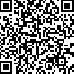

In [5]:
print(html_.decode('utf-8'))